In [11]:
import tensorflow as tf
import os 
import pandas as pd
import numpy as np 
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

ImportError: DLL load failed while importing _c_internal_utils: The specified module could not be found.

In [ ]:
pwd = os.getcwd()
filepath = os.path.join(pwd,"jena_climate_2009_2016.csv")
filepath

'c:\\Users\\ashis\\OneDrive\\Desktop\\Machine Learning\\Energy_LSTM\\jena_climate_2009_2016.csv'

In [ ]:
df = pd.read_csv(filepath)
df.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


As we can see that the dataset is huge and to reduce the computation time, we are gonna reduce the data set to hourly basis. Hence the below code will take the data at every one hour. 

In [ ]:
df = df[5::6] # This code takes the 6th column as the first coulumn and then takes every 6th element in the column. 
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [ ]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:24] # this shows the first 24 hours of the dataset

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


In [ ]:
# For this tutorial we will focus on the temperature feature of the dataset and we will create a variable called temp for the temperature. 
temp  = df['T (degC)']
temp.plot()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

### Approach to model the forecasting model 

What we will do?

We will take the temperature of first five hours in the X array as input and then corresponding output for the this X array would be Y i.e. temperature at the 6th hour. 
For next step, we will take the next five hours in the X array as the input and then corresponding output for the X array would be Y i.e. temperature at the 7th hour. 

# X = [[[1], [2], [3], [4], [5]]] y = [6]
# X = [[[2], [3], [4], [5], [6]]] y = [7]
# X = [[[3], [4], [5], [6], [7]]] y = [8]


In [ ]:
# Making a function to execute above idea 

def df_to_X_y(df, window_size=5):  # 5 here means we are taking the last 5 values 
    df_as_np = df.to_numpy() #converting the dataframe to numpy arrays 
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X, y  = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((70086, 5, 1), (70086,))

#### TRAIN, VALIDATION AND TEST DATASET SPLITTING 

In [ ]:
# making a train and test dataset to train the model 

X_train, y_train  = X[:60000], y[:60000]
X_val, y_val  = X[60000:65000], y[60000:65000]
X_test, y_test  = X[65000:], y[65000:]

In [ ]:
X_train.shape, y_train.shape

((60000, 5, 1), (60000,))

In [ ]:
X_val.shape, y_val.shape

((5000, 5, 1), (5000,))

In [ ]:
X_test.shape, y_test.shape

((5086, 5, 1), (5086,))

In [ ]:
#  Tensorflow imports 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam 

# Defining the model and adding layers into the LSTM model
model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# For callbacks we are going to make a variable named cp 

cp = ModelCheckpoint('model1/.keras', save_best_only=True) # this line of code saves the model with the lowest root_mean_squared_error. 
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()]) # Higher the learning rate faster the model is however it's unable to find the local minimum. 

In [ ]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 70.2461 - root_mean_squared_error: 8.1374 - val_loss: 1.7078 - val_root_mean_squared_error: 1.3068
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 4.1348 - root_mean_squared_error: 2.0266 - val_loss: 0.7560 - val_root_mean_squared_error: 0.8695
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.3120 - root_mean_squared_error: 1.1443 - val_loss: 0.5600 - val_root_mean_squared_error: 0.7483
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.8113 - root_mean_squared_error: 0.9004 - val_loss: 0.5120 - val_root_mean_squared_error: 0.7155
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.7113 - root_mean_squared_error: 0.8433 - val_loss: 0.5043 - val_root_mean_squared_error: 0.7101
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.6729 - root_mean_squared_error: 0.8202 - val_loss: 0.5020 - val_root_mean_squared_error: 0.7085
Epoch 7/10
1875/1875 ━━━━━━━━━━━━

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/.keras')

#### TRAIN DATASET

In [ ]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data = {'Train Predictions': train_predictions, 'Actuals': y_train})

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


In [ ]:
train_results

,Train Predictions,Actuals
0,-9.892742,-9.67
1,-9.675209,-9.17
2,-8.806313,-8.10
3,-7.358563,-7.66
4,-7.260140,-7.04
...,...,...
59995,6.196997,6.07
59996,7.358500,9.88
59997,12.386909,13.53
59998,16.234985,15.43


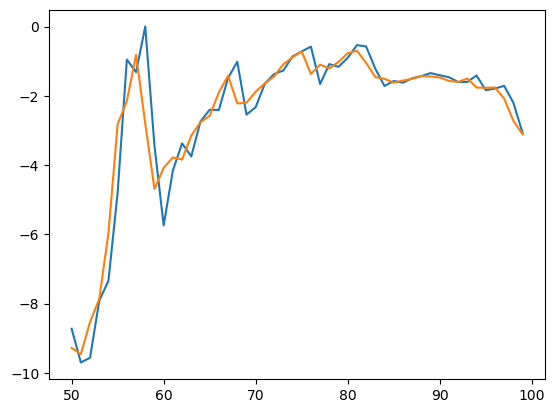

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

Above we saw the performance of model on training data, now we will look into validation dataset

#### VALIDATION DATASET

In [ ]:
val_prediction = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data = {'Val Predictions': val_prediction, 'Actuals': y_val})
val_results

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


,Val Predictions,Actuals
0,15.502428,14.02
1,13.299938,13.67
2,13.150942,12.27
3,11.554182,11.19
4,10.434038,10.85
...,...,...
4995,17.360361,18.27
4996,17.440889,17.85
4997,17.385351,16.65
4998,15.962962,15.85


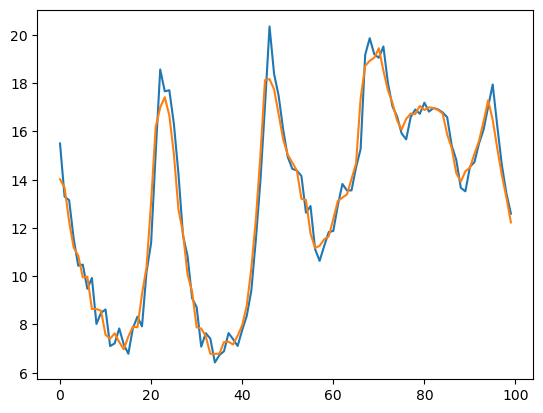

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

#### TEST DATASET

In [ ]:
test_prediction = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data = {'Test Predictions': test_prediction, 'Actuals': y_test})
test_results

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Test Predictions,Actuals
0,14.508690,13.99
1,13.327969,13.46
2,12.962358,12.93
3,12.565924,12.43
4,12.113785,12.17
...,...,...
5081,-1.122566,-0.98
5082,-1.449297,-1.40
5083,-1.657770,-2.75
5084,-3.331365,-2.89


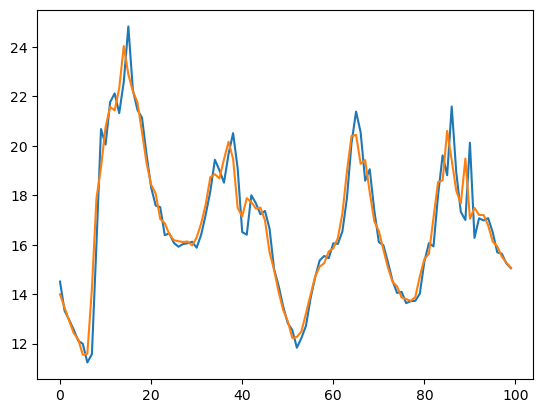

In [ ]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])